In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [11]:
X

array([[-4.60701979, -5.6154208 ],
       [-7.27426531,  4.03765009],
       [-5.76971162, -4.68123234],
       ...,
       [-5.21479679, -1.53388069],
       [-4.19567214, -3.6742551 ],
       [-8.36557495,  5.86736453]])

In [13]:
y

array([2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0,
       0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0,

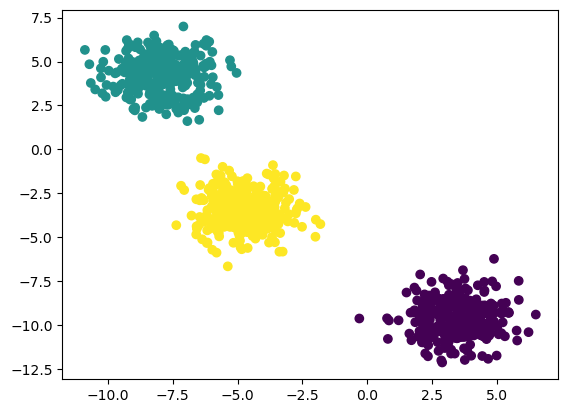

In [15]:
plt.scatter(X[:,0],X[:,1], c=y)

In [17]:
## standardization - feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.cluster import KMeans

In [27]:
## Elbow method to select the K value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [29]:
wcss

[1340.000000000001,
 291.29623501500055,
 48.16466546479806,
 41.2762808087459,
 36.55371075648793,
 29.66414986182404,
 26.32674679799484,
 23.08929623026461,
 21.69914967056716,
 19.009279509154993]

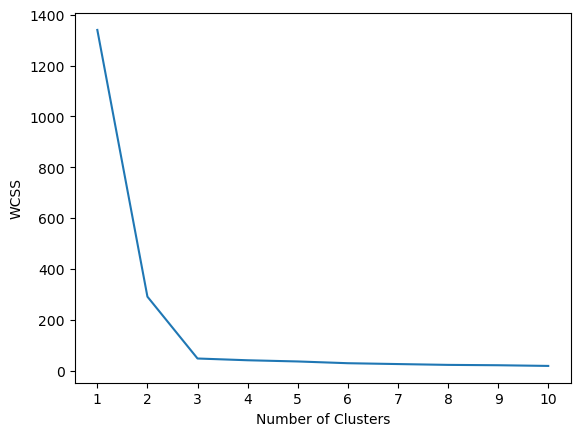

In [31]:
## Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3,init="k-means++")

In [35]:
kmeans.fit_predict(X_train_scaled)

C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2,
       2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0,
       0, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2,

In [37]:
y_pred = kmeans.predict(X_test_scaled)

In [39]:
y_pred

array([1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1,
       1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0,
       1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1,
       0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2,
       2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2,

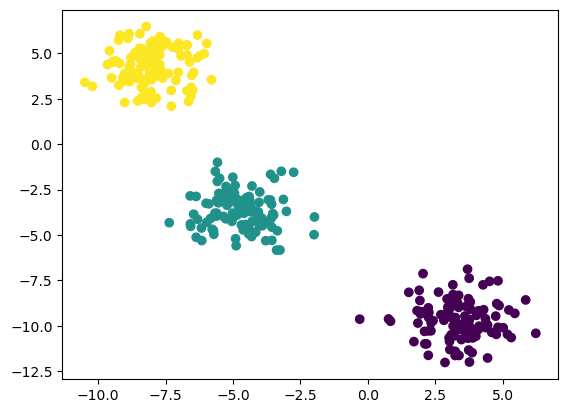

In [41]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred)

In [45]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [47]:
## kneelocator
!pip install kneed

In [49]:
from kneed import KneeLocator

In [51]:
kl = KneeLocator(range(1,11),wcss, curve='convex',direction="decreasing")

In [53]:
kl.elbow

3

In [55]:
## silhoutte scoring
from sklearn.metrics import silhouette_score

In [57]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [59]:
silhouette_coefficients

[0.7135857352533284,
 0.7905108970470273,
 0.652911497986348,
 0.6295119761313889,
 0.3492423123131487,
 0.3505478324336934,
 0.33251970593261787,
 0.3543347249199154,
 0.3560901934053296]

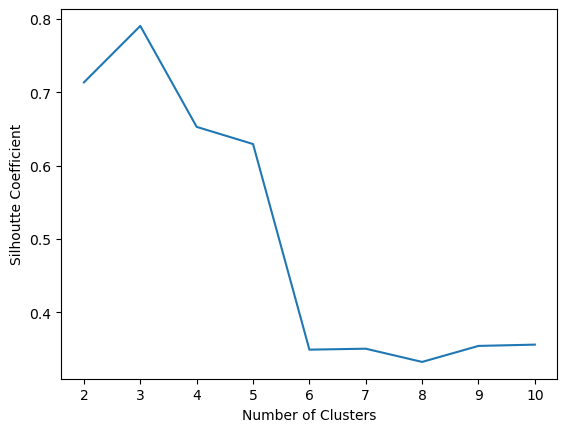

In [61]:
## Plot elbow curve
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show()